In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [21]:
path1 = r"D:\IMARTICUS\Brain tummor"
cate = ['yes','no']


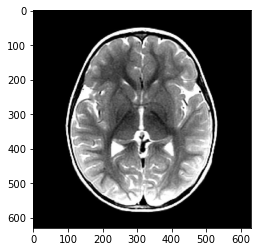

In [22]:
for i in cate:
    folders = os.path.join(path1 , i)
    for images in os.listdir(folders):
        image_path = os.path.join(folders,images)
        image_path = cv2.imread(image_path)
        plt.imshow(image_path)
        break

In [23]:
image_size = 200
input_image = []
for i in cate:
    folders = os.path.join(path1 , i)
    label = cate.index(i)
    for images in os.listdir(folders):
        image_path = os.path.join(folders,images)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size,image_size))
        input_image.append([image_array,label])

In [24]:
len(input_image)

2016

In [11]:
np.random.shuffle(input_image)

In [25]:
train = input_image[0:1411]
test =input_image[1411::]

In [26]:
train_X = []
train_Y = []

for x_values,y_values in train:
    train_X.append(x_values)
    train_Y.append(y_values)

In [27]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [28]:
train_X=train_X/255

In [29]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [30]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters = 64 ,kernel_size=(5,5),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64 ,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))

In [31]:
model.compile(optimizer  = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [32]:
model.fit(train_X,train_Y,epochs = 9)

Epoch 1/9
45/45 [==============================] - 76s 2s/step - loss: 0.6192 - accuracy: 0.7966
Epoch 2/9
45/45 [==============================] - 62s 1s/step - loss: 0.2410 - accuracy: 0.9086
Epoch 3/9
45/45 [==============================] - 60s 1s/step - loss: 0.1578 - accuracy: 0.9440
Epoch 4/9
45/45 [==============================] - 66s 1s/step - loss: 0.0926 - accuracy: 0.9695
Epoch 5/9
45/45 [==============================] - 64s 1s/step - loss: 0.0586 - accuracy: 0.9787
Epoch 6/9
45/45 [==============================] - 62s 1s/step - loss: 0.0493 - accuracy: 0.9830
Epoch 7/9
45/45 [==============================] - 67s 1s/step - loss: 0.0107 - accuracy: 0.9986
Epoch 8/9
45/45 [==============================] - 66s 1s/step - loss: 0.0072 - accuracy: 0.9986
Epoch 9/9
45/45 [==============================] - 66s 1s/step - loss: 0.0045 - accuracy: 0.9993


In [33]:
test_x = []
test_y = []

for x_value,y_value in test:
    test_x.append(x_value)
    test_y.append(y_value)

In [34]:
test_x = np.array(test_x)
test_y = np.array(test_y)

In [35]:
test_x = test_x/255

In [36]:
pred = model.predict(test_x)

19/19 [==============================] - 4s 204ms/step


In [37]:
pred_class = np.argmax(pred , axis =1)
pred_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score

In [42]:
#confusion_matrix(test_y,pred_class)

In [43]:
#accuracy_score(test_y,pred_class)

In [44]:
#recall_score(test_y,pred_class)

In [45]:
model.save('BrainTummorModel.h5')

In [46]:
from  keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline
from tensorflow.keras.preprocessing import image

In [47]:
br_pr = load_model('BrainTummorModel.h5')

In [51]:
import os 
os.chdir(r"D:\IMARTICUS\Brain tummor\pred")

In [52]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(image_size,image_size))  # data import 7 convert image into height= 64 , width = 64 
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = br_pr.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if Probability > 0.5:
        print("It's a brain_tumore")
    else:
        print("no sign of brain_tumore")

1/1 [==============================] - 0s 61ms/step
Probability 0.44675377
no sign of brain_tumore


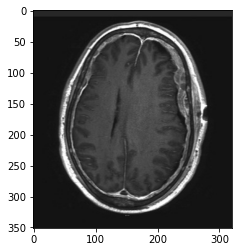

In [53]:
model_output('pred26.jpg')

1/1 [==============================] - 0s 22ms/step
Probability 0.9780638
It's a brain_tumore


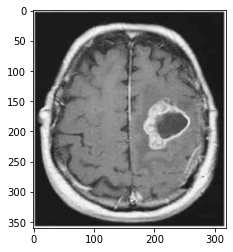

In [55]:
model_output('pred56.jpg')

1/1 [==============================] - 0s 39ms/step
Probability 0.70564723
It's a brain_tumore


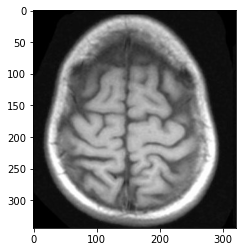

In [57]:
model_output('pred39.jpg')